In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
pd.options.display.float_format = '{:.3f}'.format

In [4]:
pd.options.display.max_columns=None

In [5]:
concatenado_unidades = pd.read_parquet('/content/drive/MyDrive/Cópia arquivos Python+TCC/4 BACTÉRIAS SELECIONADAS.parquet')
concatenado_unidades

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
49,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0
50,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0
78,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.090,6.780,71.000,80.700,7.000,5.870,NaN,150.000,65.000,NaN,0.862,0.870,0.575,NaN,0
79,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,21.160,6.770,81.000,82.400,9.000,5.370,NaN,168.000,81.000,NaN,0.717,0.890,0.769,NaN,0
80,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,18.000,20.550,6.840,66.000,82.100,7.000,6.710,NaN,156.000,92.000,NaN,0.931,0.880,0.655,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,SUDESTE,RJ,RESENDE,2018-12-17,RIO PARAIBA DO SUL,rio,Microcystis sp.,30.000,0.000,0.200,28.000,24.900,7.180,33.400,NaN,NaN,7.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6360,SUDESTE,RJ,RESENDE,2017-06-12,RIO PARAIBA DO SUL,rio,Microcystis sp.,16.000,0.000,0.200,29.000,23.170,7.680,2.700,91.900,NaN,7.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6363,SUDESTE,RJ,RESENDE,2018-12-17,RIO PARAIBA DO SUL,rio,Microcystis sp.,0.000,0.000,0.200,28.000,24.900,7.180,33.400,NaN,NaN,7.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6422,SUDESTE,RJ,RESENDE,2017-06-12,RIO PARAIBA DO SUL,rio,Microcystis sp.,52.000,0.000,0.200,29.000,23.170,7.680,2.700,91.900,NaN,7.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Geitlerinema sp. = 237 classe 1 (3,54%)

## *Início*

In [6]:
df_geitlerinema = concatenado_unidades[concatenado_unidades['Unidade']=='Geitlerinema sp.']
df_geitlerinema.describe()

,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
count,6907.000,4457.000,2826.000,6231.000,6625.000,6511.000,6259.000,1390.000,3364.000,6436.000,2710.000,3038.000,3612.000,1896.000,3206.000,3171.000,3375.000,2803.000,6907.000
mean,3872.514,0.112,0.620,27.186,25.000,7.158,38.575,306.294,4.068,7.253,210.428,107.752,267.668,1.510,0.736,34.780,0.116,15.251,0.035
std,23487.101,0.323,2.904,4.759,5.249,1.014,182.159,3360.505,13.959,5.296,867.858,1682.366,2160.732,2.117,2.929,513.736,0.337,225.837,0.183
min,0.000,0.000,0.000,0.000,0.000,0.000,-0.270,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.200,25.000,22.500,6.720,4.500,46.425,2.000,6.190,58.000,10.000,50.000,1.000,0.100,0.030,0.020,0.801,0.000
50%,0.000,0.000,0.250,27.630,25.500,7.200,11.000,70.700,2.000,7.185,92.000,50.000,68.000,1.000,0.280,0.250,0.040,1.600,0.000
75%,196.000,0.000,0.500,30.000,28.100,7.660,27.000,97.700,3.000,8.000,162.000,50.000,119.000,1.200,0.400,0.750,0.100,4.680,0.000
max,576000.000,2.000,87.500,41.100,265.000,14.000,8600.000,69600.000,465.000,117.100,25582.000,59400.000,51860.000,32.400,62.200,21450.000,11.000,8339.760,1.000


In [7]:
df_geitlerinema['Classe'].value_counts()

,count
Classe,
0,6668
1,239


In [9]:
df_geitlerinema[df_geitlerinema['Classe']==1]['Choveu'].value_counts()

,count
Choveu,
0.000,148
1.000,12


In [ ]:
#df_geitlerinema = df_geitlerinema[df_geitlerinema['Choveu']!=2]

In [10]:
df_geitlerinema.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6907 entries, 0 to 6435
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Região Geográfica                   6907 non-null   object 
 1   UF                                  6907 non-null   object 
 2   Município                           6907 non-null   object 
 3   Date_x                              6907 non-null   object 
 4   Nome do manancial superficial       6907 non-null   object 
 5   Categoria do manancial superficial  6907 non-null   object 
 6   Unidade                             6907 non-null   object 
 7   Resultado                           6907 non-null   float64
 8   Choveu                              4457 non-null   float64
 9   Profundidade                        2826 non-null   float64
 10  TempAr                              6231 non-null   float64
 11  TempAmostra                         6625 non-nul

In [11]:
df_geitlerinema.head(5)

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
0,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0
1,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0
164,SUL,RS,NOVA SANTA RITA,2018-10-20,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.500,27.000,21.900,6.900,26.900,61.500,NaN,7.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
176,SUL,RS,SANTO ANTONIO DA PATRULHA,2017-04-03,RIO DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.500,24.000,22.200,7.400,7.600,89.300,NaN,8.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
329,SUL,RS,NOVA SANTA RITA,2018-08-01,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.500,16.500,15.600,7.760,47.700,128.500,NaN,6.460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [12]:
# ESTAÇÕES DO ANO

# Converte a coluna Date_x para datetime
df_geitlerinema['Date_x'] = pd.to_datetime(df_geitlerinema['Date_x'])

# Tabela com as datas de início das estações do ano (hemisfério sul)
estacoes_inicio = {
    2014: {'Verao': '2013-12-21', 'Outono': '2014-03-20', 'Inverno': '2014-06-21', 'Primavera': '2014-09-23'},
    2015: {'Verao': '2014-12-21', 'Outono': '2015-03-20', 'Inverno': '2015-06-21', 'Primavera': '2015-09-23'},
    2016: {'Verao': '2015-12-22', 'Outono': '2016-03-20', 'Inverno': '2016-06-20', 'Primavera': '2016-09-22'},
    2017: {'Verao': '2016-12-21', 'Outono': '2017-03-20', 'Inverno': '2017-06-21', 'Primavera': '2017-09-22'},
    2018: {'Verao': '2017-12-21', 'Outono': '2018-03-20', 'Inverno': '2018-06-21', 'Primavera': '2018-09-22'},
    2019: {'Verao': '2018-12-21', 'Outono': '2019-03-20', 'Inverno': '2019-06-21', 'Primavera': '2019-09-23'},
    2020: {'Verao': '2019-12-22', 'Outono': '2020-03-20', 'Inverno': '2020-06-20', 'Primavera': '2020-09-22'},
    2021: {'Verao': '2020-12-21', 'Outono': '2021-03-20', 'Inverno': '2021-06-21', 'Primavera': '2021-09-22'},
    2022: {'Verao': '2021-12-21', 'Outono': '2022-03-20', 'Inverno': '2022-06-21', 'Primavera': '2022-09-23'},
    2023: {'Verao': '2022-12-21', 'Outono': '2023-03-20', 'Inverno': '2023-06-21', 'Primavera': '2023-09-23'}
}

# Função para determinar a estação do ano
def get_season(date):
    year = date.year
    start_dates = estacoes_inicio.get(year, None)
    if not start_dates:
        return None  # Se o ano não estiver na tabela, retorne None

    verao = pd.Timestamp(start_dates['Verao'])
    outono = pd.Timestamp(start_dates['Outono'])
    inverno = pd.Timestamp(start_dates['Inverno'])
    primavera = pd.Timestamp(start_dates['Primavera'])

    if verao <= date < outono:
        return 'Verao'
    elif outono <= date < inverno:
        return 'Outono'
    elif inverno <= date < primavera:
        return 'Inverno'
    else:
        return 'Primavera'

# Aplica a função para criar uma coluna com a estação
df_geitlerinema['Estacao'] = df_geitlerinema['Date_x'].apply(get_season)

# Cria colunas binárias para cada estação
df_geitlerinema['Verao'] = (df_geitlerinema['Estacao'] == 'Verao').astype(int)
df_geitlerinema['Outono'] = (df_geitlerinema['Estacao'] == 'Outono').astype(int)
df_geitlerinema['Inverno'] = (df_geitlerinema['Estacao'] == 'Inverno').astype(int)
df_geitlerinema['Primavera'] = (df_geitlerinema['Estacao'] == 'Primavera').astype(int)

# Remove a coluna intermediária de estação, se não for mais necessária
df_geitlerinema.drop(columns=['Estacao'], inplace=True)

# Visualizar o resultado
df_geitlerinema.head(5)

<ipython-input-12-1b1dea556d07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geitlerinema['Date_x'] = pd.to_datetime(df_geitlerinema['Date_x'])
<ipython-input-12-1b1dea556d07>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geitlerinema['Estacao'] = df_geitlerinema['Date_x'].apply(get_season)
<ipython-input-12-1b1dea556d07>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera
0,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0,0,0,0,1
1,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0,0,0,0,1
164,SUL,RS,NOVA SANTA RITA,2018-10-20,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.500,27.000,21.900,6.900,26.900,61.500,NaN,7.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
176,SUL,RS,SANTO ANTONIO DA PATRULHA,2017-04-03,RIO DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.500,24.000,22.200,7.400,7.600,89.300,NaN,8.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
329,SUL,RS,NOVA SANTA RITA,2018-08-01,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.500,16.500,15.600,7.760,47.700,128.500,NaN,6.460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0


In [14]:
df_geitlerinema.head(5)

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera
0,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.200,21.000,12.500,6.460,57.000,44.300,2.000,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0,0,0,0,1
1,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.200,25.900,20.300,7.150,5.000,66.700,2.000,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0,0,0,0,1
164,SUL,RS,NOVA SANTA RITA,2018-10-20,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.500,27.000,21.900,6.900,26.900,61.500,NaN,7.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
176,SUL,RS,SANTO ANTONIO DA PATRULHA,2017-04-03,RIO DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.500,24.000,22.200,7.400,7.600,89.300,NaN,8.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
329,SUL,RS,NOVA SANTA RITA,2018-08-01,DOS SINOS,rio,Geitlerinema sp.,0.000,0.000,0.500,16.500,15.600,7.760,47.700,128.500,NaN,6.460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0


In [15]:
# DELTA DE TEMPERATURA AR - TEMPERATURA AGUA (DELTA T)

df_geitlerinema['Delta T'] = df_geitlerinema['TempAr'] - df_geitlerinema['TempAmostra']
df_geitlerinema['Delta T']

<ipython-input-15-e2ba6efd997f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geitlerinema['Delta T'] = df_geitlerinema['TempAr'] - df_geitlerinema['TempAmostra']


,Delta T
0,8.500
1,5.600
164,5.100
176,1.800
329,0.900
...,...
6384,4.200
6415,3.100
6429,-0.400
6430,-0.520


In [16]:
df_geitlerinema.columns

Index(['Região Geográfica', 'UF', 'Município', 'Date_x',
       'Nome do manancial superficial', 'Categoria do manancial superficial',
       'Unidade', 'Resultado', 'Choveu', 'Profundidade', 'TempAr',
       'TempAmostra', 'pH', 'Turbidez', 'CondutividadeEletrica', 'DBO', 'OD',
       'SolTotais', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
       'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal',
       'Clorofila', 'Classe', 'Verao', 'Outono', 'Inverno', 'Primavera',
       'Delta T'],
      dtype='object')

In [17]:
features_possiveis_geitlerinema = ['Choveu', 'Profundidade', 'TempAr', 'TempAmostra', 'pH', 'Turbidez','CondutividadeEletrica', 'DBO', 'OD', 'SolTotais', 'SolSuspensaoTotais',
                            'SolDissolvidosTotais', 'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal', 'Clorofila', 'Primavera','Verao',
                            'Outono','Inverno', 'Verao', 'Outono', 'Inverno', 'Primavera','Delta T']
output_micro = 'Classe'

len(features_possiveis_geitlerinema)

26

In [18]:
df_geitlerinema_c1 = df_geitlerinema[df_geitlerinema['Classe']==1]
df_geitlerinema_c0 = df_geitlerinema[df_geitlerinema['Classe']==0]

In [19]:
df_geitlerinema_c1.describe()

,Date_x,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera,Delta T
count,239,239.000,160.000,81.000,225.000,225.000,224.000,192.000,54.000,129.000,202.000,112.000,104.000,136.000,66.000,140.000,142.000,142.000,128.000,239.000,239.000,239.000,239.000,239.000,224.000
mean,2018-08-01 19:46:56.736401664,81566.510,0.075,1.109,29.038,27.623,7.523,41.405,2842.356,4.210,7.289,209.429,46.329,1041.989,1.507,0.584,0.334,0.142,20.403,1.000,0.188,0.377,0.142,0.293,1.433
min,2017-01-16 00:00:00,20700.000,0.000,0.000,18.000,18.300,4.040,0.000,19.800,1.000,1.610,32.000,0.400,24.000,0.290,0.020,0.001,0.010,0.010,1.000,0.000,0.000,0.000,0.000,-6.610
25%,2017-06-19 00:00:00,28000.000,0.000,0.200,27.000,26.000,6.938,2.600,62.525,2.000,6.225,76.750,7.750,50.000,1.000,0.102,0.080,0.020,0.913,1.000,0.000,0.000,0.000,0.000,-0.600
50%,2018-04-18 00:00:00,42432.000,0.000,0.300,29.000,28.200,7.620,8.500,256.700,2.900,7.115,156.000,22.500,167.500,1.000,0.250,0.199,0.070,2.665,1.000,0.000,0.000,0.000,0.000,1.500
75%,2019-09-25 00:00:00,88400.000,0.000,0.300,31.600,29.900,8.260,22.275,463.400,5.100,8.088,269.750,50.000,278.725,1.800,0.400,0.500,0.180,15.138,1.000,0.000,1.000,0.000,1.000,3.300
max,2021-07-06 00:00:00,576000.000,1.000,30.000,38.000,34.300,9.610,1188.100,69600.000,38.000,30.900,2046.000,487.000,43746.000,6.000,9.280,1.500,1.020,489.000,1.000,1.000,1.000,1.000,1.000,8.700
std,NaN,97378.481,0.264,4.650,3.727,3.397,1.031,118.512,13216.892,4.130,2.670,232.942,77.975,5726.596,1.019,1.603,0.350,0.191,53.804,0.000,0.392,0.486,0.350,0.456,2.580


In [20]:
# Calculando a porcentagem de valores nulos em cada coluna
null_percentage = (df_geitlerinema_c1.isnull().sum() / len(df_geitlerinema_c1)) * 100

# Criando o dataframe com duas colunas: Feature e Porcentagem
df_geitlerinema_c1_perc = pd.DataFrame({
    "Feature": df_geitlerinema_c1.columns,
    "Porcentagem (%)": null_percentage
}).reset_index(drop=True)

# Formatando a coluna de porcentagem com duas casas decimais
#df_micro_c1_perc["Porcentagem (%)"] = df_micro_c1_perc["Porcentagem (%)"].map("{:.2f}".format)

# Exibindo o dataframe gerado
df_geitlerinema_c1_perc.sort_values(by="Porcentagem (%)", ascending=False)

,Feature,Porcentagem (%)
14,CondutividadeEletrica,77.406
20,NitrogenioTotal,72.385
9,Profundidade,66.109
18,SolSuspensaoTotais,56.485
17,SolTotais,53.138
24,Clorofila,46.444
15,DBO,46.025
19,SolDissolvidosTotais,43.096
21,NitrogenioAmoniacal,41.423
23,FosforoTotal,40.586


In [21]:
# Calculando a porcentagem de valores nulos em cada coluna
null_percentage = (df_geitlerinema_c0.isnull().sum() / len(df_geitlerinema_c0)) * 100

# Criando o dataframe com duas colunas: Feature e Porcentagem
df_geitlerinema_c0_perc = pd.DataFrame({
    "Feature": df_geitlerinema_c0.columns,
    "Porcentagem (%)": null_percentage
}).reset_index(drop=True)

# Formatando a coluna de porcentagem com duas casas decimais
#df_micro_c1_perc["Porcentagem (%)"] = df_micro_c1_perc["Porcentagem (%)"].map("{:.2f}".format)

# Exibindo o dataframe gerado
df_geitlerinema_c0_perc.sort_values(by="Porcentagem (%)", ascending=False)

,Feature,Porcentagem (%)
14,CondutividadeEletrica,79.964
20,NitrogenioTotal,72.555
17,SolTotais,61.038
24,Clorofila,59.883
9,Profundidade,58.833
18,SolSuspensaoTotais,55.999
22,Nitratos,54.574
21,NitrogenioAmoniacal,54.019
23,FosforoTotal,51.515
15,DBO,51.485


In [22]:
df_geitlerinema.columns

Index(['Região Geográfica', 'UF', 'Município', 'Date_x',
       'Nome do manancial superficial', 'Categoria do manancial superficial',
       'Unidade', 'Resultado', 'Choveu', 'Profundidade', 'TempAr',
       'TempAmostra', 'pH', 'Turbidez', 'CondutividadeEletrica', 'DBO', 'OD',
       'SolTotais', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
       'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal',
       'Clorofila', 'Classe', 'Verao', 'Outono', 'Inverno', 'Primavera',
       'Delta T'],
      dtype='object')

In [23]:
colunas_50_manter = df_geitlerinema_c1_perc[df_geitlerinema_c1_perc['Porcentagem (%)']<=50]

colunas_50_manter = colunas_50_manter.sort_values(by='Porcentagem (%)', ascending=False)['Feature']
colunas_50_manter.head(28).reset_index(drop=True)

,Feature
0,Clorofila
1,DBO
2,SolDissolvidosTotais
3,NitrogenioAmoniacal
4,FosforoTotal
5,Nitratos
6,Choveu
7,Turbidez
8,OD
9,pH


In [24]:
df_geitlerinema_50 = df_geitlerinema[colunas_50_manter.head(26)]
df_geitlerinema_50.head(5)

,Clorofila,DBO,SolDissolvidosTotais,NitrogenioAmoniacal,FosforoTotal,Nitratos,Choveu,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,UF,Resultado,Unidade,Categoria do manancial superficial,Nome do manancial superficial,Date_x,Município,Classe,Verao,Outono,Inverno,Primavera,Região Geográfica
0,NaN,2.000,36.000,0.110,0.062,NaN,0.000,57.000,10.210,6.460,8.500,12.500,21.000,RS,0.000,Geitlerinema sp.,rio,DOS SINOS,2016-10-11,CAMPO BOM,0,0,0,0,1,SUL
1,NaN,2.000,98.000,0.195,0.116,NaN,0.000,5.000,8.400,7.150,5.600,20.300,25.900,RS,0.000,Geitlerinema sp.,rio,DOS SINOS,2016-10-11,CAMPO BOM,0,0,0,0,1,SUL
164,NaN,NaN,NaN,NaN,NaN,NaN,0.000,26.900,7.600,6.900,5.100,21.900,27.000,RS,0.000,Geitlerinema sp.,rio,DOS SINOS,2018-10-20,NOVA SANTA RITA,0,0,0,0,1,SUL
176,NaN,NaN,NaN,NaN,NaN,NaN,0.000,7.600,8.400,7.400,1.800,22.200,24.000,RS,0.000,Geitlerinema sp.,rio,RIO DOS SINOS,2017-04-03,SANTO ANTONIO DA PATRULHA,0,0,1,0,0,SUL
329,NaN,NaN,NaN,NaN,NaN,NaN,0.000,47.700,6.460,7.760,0.900,15.600,16.500,RS,0.000,Geitlerinema sp.,rio,DOS SINOS,2018-08-01,NOVA SANTA RITA,0,0,0,1,0,SUL


In [25]:
df_geitlerinema_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6907 entries, 0 to 6435
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Clorofila                           2803 non-null   float64       
 1   DBO                                 3364 non-null   float64       
 2   SolDissolvidosTotais                3612 non-null   float64       
 3   NitrogenioAmoniacal                 3206 non-null   float64       
 4   FosforoTotal                        3375 non-null   float64       
 5   Nitratos                            3171 non-null   float64       
 6   Choveu                              4457 non-null   float64       
 7   Turbidez                            6259 non-null   float64       
 8   OD                                  6436 non-null   float64       
 9   pH                                  6511 non-null   float64       
 10  Delta T                      

In [26]:
df_geitlerinema_50_c1 = df_geitlerinema_50[df_geitlerinema_50['Classe']==1]
df_geitlerinema_50_c0 = df_geitlerinema_50[df_geitlerinema_50['Classe']==0]

In [27]:
df_geitlerinema_50_c1.columns

Index(['Clorofila', 'DBO', 'SolDissolvidosTotais', 'NitrogenioAmoniacal',
       'FosforoTotal', 'Nitratos', 'Choveu', 'Turbidez', 'OD', 'pH', 'Delta T',
       'TempAmostra', 'TempAr', 'UF', 'Resultado', 'Unidade',
       'Categoria do manancial superficial', 'Nome do manancial superficial',
       'Date_x', 'Município', 'Classe', 'Verao', 'Outono', 'Inverno',
       'Primavera', 'Região Geográfica'],
      dtype='object')

In [28]:
df_geitlerinema_50_c1.describe()

,Clorofila,DBO,SolDissolvidosTotais,NitrogenioAmoniacal,FosforoTotal,Nitratos,Choveu,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera
count,128.000,129.000,136.000,140.000,142.000,142.000,160.000,192.000,202.000,224.000,224.000,225.000,225.000,239.000,239,239.000,239.000,239.000,239.000,239.000
mean,20.403,4.210,1041.989,0.584,0.142,0.334,0.075,41.405,7.289,7.523,1.433,27.623,29.038,81566.510,2018-08-01 19:46:56.736401664,1.000,0.188,0.377,0.142,0.293
min,0.010,1.000,24.000,0.020,0.010,0.001,0.000,0.000,1.610,4.040,-6.610,18.300,18.000,20700.000,2017-01-16 00:00:00,1.000,0.000,0.000,0.000,0.000
25%,0.913,2.000,50.000,0.102,0.020,0.080,0.000,2.600,6.225,6.938,-0.600,26.000,27.000,28000.000,2017-06-19 00:00:00,1.000,0.000,0.000,0.000,0.000
50%,2.665,2.900,167.500,0.250,0.070,0.199,0.000,8.500,7.115,7.620,1.500,28.200,29.000,42432.000,2018-04-18 00:00:00,1.000,0.000,0.000,0.000,0.000
75%,15.138,5.100,278.725,0.400,0.180,0.500,0.000,22.275,8.088,8.260,3.300,29.900,31.600,88400.000,2019-09-25 00:00:00,1.000,0.000,1.000,0.000,1.000
max,489.000,38.000,43746.000,9.280,1.020,1.500,1.000,1188.100,30.900,9.610,8.700,34.300,38.000,576000.000,2021-07-06 00:00:00,1.000,1.000,1.000,1.000,1.000
std,53.804,4.130,5726.596,1.603,0.191,0.350,0.264,118.512,2.670,1.031,2.580,3.397,3.727,97378.481,NaN,0.000,0.392,0.486,0.350,0.456


# **Features inicialmente:**
[
    'CondutividadeEletrica', 'Profundidade', 'Choveu', 'NitrogenioTotal',
    'Nitratos', 'NitrogenioAmoniacal', 'DBO', 'Clorofila', 'FosforoTotal',
    'Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
    'TempAmostra', 'SolTotais', 'pH', 'Turbidez', 'OD',
    'Primavera', 'Inverno', 'Outono', 'Verao'
]


# **Features selecionadas:**
['Nitratos', 'NitrogenioAmoniacal', 'DBO' 'FosforoTotal', 'Delta T', 'TempAr', 'SolDissolvidosTotais', 'TempAmostra', 'pH', 'Turbidez', 'OD', 'Primavera', 'Inverno', 'Outono', 'Verao', 'Clorofila']


# **Features excluídas:**
['CondutividadeEletrica', 'Profundidade', 'Choveu', 'NitrogenioTotal', 'SolSuspensaoTotais', 'SolTotais']

## Imputação dos valores ausentes

In [29]:
df_geitlerinema_50_c1 = df_geitlerinema_50_c1.drop('Choveu', axis=1)

In [30]:
df_geitlerinema_50_c0 =  df_geitlerinema_50_c0.drop('Choveu', axis=1)

In [31]:
from sklearn.ensemble import RandomForestRegressor

columns_with_na = ['Nitratos', 'NitrogenioAmoniacal', 'DBO', 'FosforoTotal', 'Delta T',
                   'TempAr', 'SolDissolvidosTotais', 'TempAmostra', 'pH', 'Turbidez',
                   'OD', 'Clorofila']


# Colunas a serem excluídas durante o treinamento
drop_columns = ['Região Geográfica', 'UF', 'Município', 'Date_x',
                'Nome do manancial superficial', 'Categoria do manancial superficial',
                'Unidade', 'Resultado', 'Classe',]#'Primavera', 'Inverno', 'Outono', 'Verao']


for col in columns_with_na:
    # Dividir os dados em completo e incompleto
    complete_data = df_geitlerinema_50_c1[df_geitlerinema_50_c1[col].notnull()]
    missing_data = df_geitlerinema_50_c1[df_geitlerinema_50_c1[col].isnull()]

    # Treinar modelo de Random Forest
    X_train = complete_data.drop(columns=[col] + drop_columns)  # Removendo a coluna atual e as colunas irrelevantes
    y_train = complete_data[col]

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Prever e preencher os valores ausentes
    X_missing = missing_data.drop(columns=[col] + drop_columns)  # Removendo colunas irrelevantes
    predicted_values = rf_model.predict(X_missing)
    df_geitlerinema_50_c1.loc[df_geitlerinema_50_c1[col].isnull(), col] = predicted_values

In [32]:
df_geitlerinema_50_c1.describe()

,Clorofila,DBO,SolDissolvidosTotais,NitrogenioAmoniacal,FosforoTotal,Nitratos,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera
count,239.000,239.000,239.000,239.000,239.000,239.000,239.000,239.000,239.000,239.000,239.000,239.000,239.000,239,239.000,239.000,239.000,239.000,239.000
mean,23.172,4.137,751.122,0.424,0.147,0.366,38.114,7.407,7.532,1.344,27.650,28.930,81566.510,2018-08-01 19:46:56.736401664,1.000,0.188,0.377,0.142,0.293
min,0.010,1.000,24.000,0.020,0.010,0.001,0.000,1.610,4.040,-6.610,18.300,18.000,20700.000,2017-01-16 00:00:00,1.000,0.000,0.000,0.000,0.000
25%,2.060,2.000,133.414,0.111,0.047,0.100,4.100,6.390,6.985,-0.500,26.040,27.000,28000.000,2017-06-19 00:00:00,1.000,0.000,0.000,0.000,0.000
50%,9.772,3.650,243.043,0.173,0.121,0.366,10.808,7.171,7.620,1.130,28.197,28.700,42432.000,2018-04-18 00:00:00,1.000,0.000,0.000,0.000,0.000
75%,25.481,4.600,299.554,0.400,0.186,0.500,23.348,8.100,8.192,3.105,29.750,31.400,88400.000,2019-09-25 00:00:00,1.000,0.000,1.000,0.000,1.000
max,489.000,38.000,43746.000,9.280,1.020,1.500,1188.100,30.900,9.610,8.700,34.300,38.000,576000.000,2021-07-06 00:00:00,1.000,1.000,1.000,1.000,1.000
std,42.936,3.155,4331.061,1.246,0.151,0.285,107.996,2.557,0.999,2.522,3.299,3.643,97378.481,NaN,0.000,0.392,0.486,0.350,0.456


In [33]:
df_geitlerinema_50_c0.describe()

,Clorofila,DBO,SolDissolvidosTotais,NitrogenioAmoniacal,FosforoTotal,Nitratos,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera
count,2675.000,3235.000,3476.000,3066.000,3233.000,3029.000,6067.000,6234.000,6287.000,5963.000,6400.000,6006.000,6668.000,6668,6668.000,6668.000,6668.000,6668.000,6668.000
mean,15.005,4.062,237.373,0.742,0.115,36.395,38.486,7.252,7.145,2.139,24.908,27.117,1087.741,2019-04-29 09:55:10.617876736,0.000,0.165,0.239,0.271,0.325
min,0.000,0.000,0.000,0.000,0.000,0.000,-0.270,0.000,0.000,-241.700,0.000,0.000,0.000,2014-02-18 00:00:00,0.000,0.000,0.000,0.000,0.000
25%,0.801,2.000,50.000,0.100,0.020,0.030,4.600,6.182,6.710,-0.100,22.300,25.000,0.000,2018-05-14 00:00:00,0.000,0.000,0.000,0.000,0.000
50%,1.600,2.000,66.500,0.280,0.040,0.250,11.000,7.190,7.200,2.000,25.400,27.500,0.000,2019-02-14 00:00:00,0.000,0.000,0.000,0.000,0.000
75%,4.375,3.000,112.000,0.400,0.096,0.760,27.000,8.000,7.640,4.405,28.000,30.000,114.000,2019-11-08 00:00:00,0.000,0.000,0.000,1.000,1.000
max,8339.760,465.000,51860.000,62.200,11.000,21450.000,8600.000,117.100,14.000,27.700,265.000,41.100,19800.000,2023-12-13 00:00:00,0.000,1.000,1.000,1.000,1.000
std,230.878,14.211,1884.965,2.976,0.342,525.588,183.819,5.360,1.011,4.708,5.279,4.780,2959.708,NaN,0.000,0.371,0.427,0.444,0.468


In [34]:
df_geitlerinema_50_c0_dropado = df_geitlerinema_50_c0.dropna(how='any')
df_geitlerinema_50_c0_dropado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 116 to 6078
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Clorofila                           1847 non-null   float64       
 1   DBO                                 1847 non-null   float64       
 2   SolDissolvidosTotais                1847 non-null   float64       
 3   NitrogenioAmoniacal                 1847 non-null   float64       
 4   FosforoTotal                        1847 non-null   float64       
 5   Nitratos                            1847 non-null   float64       
 6   Turbidez                            1847 non-null   float64       
 7   OD                                  1847 non-null   float64       
 8   pH                                  1847 non-null   float64       
 9   Delta T                             1847 non-null   float64       
 10  TempAmostra                

## RETIRAR OUTLIERS

Linhas antes da remoção: 1847
Linhas após a remoção de outliers: 1760


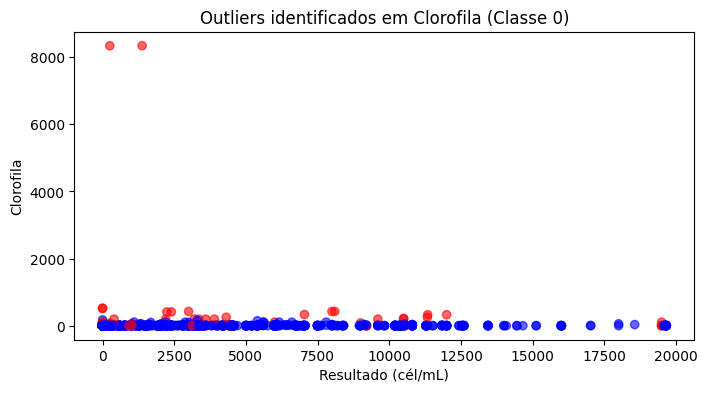

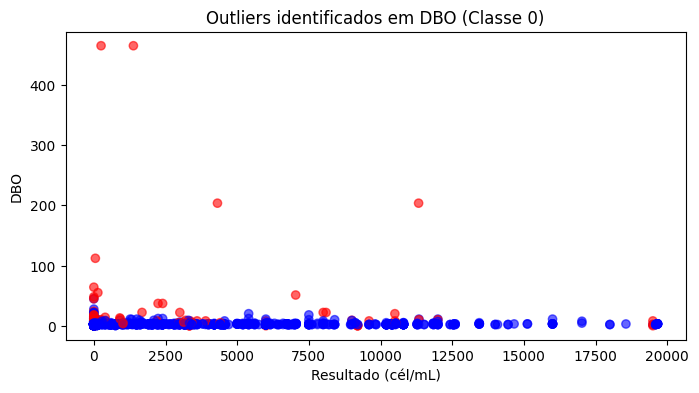

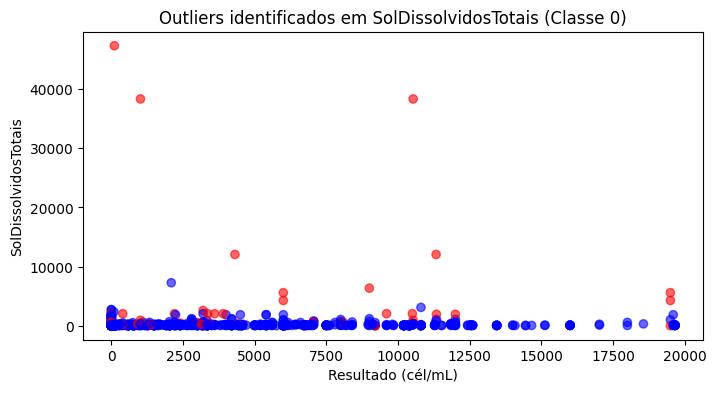

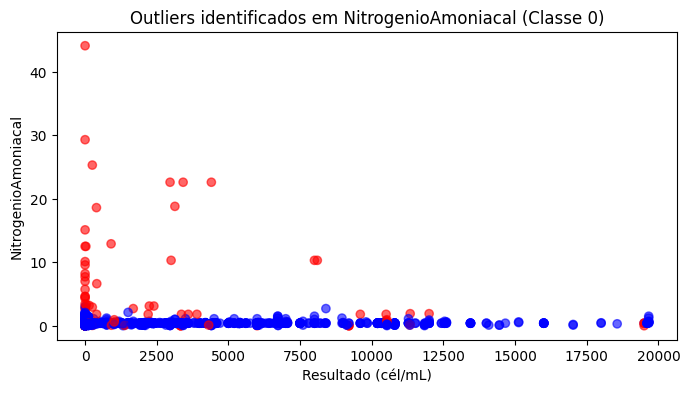

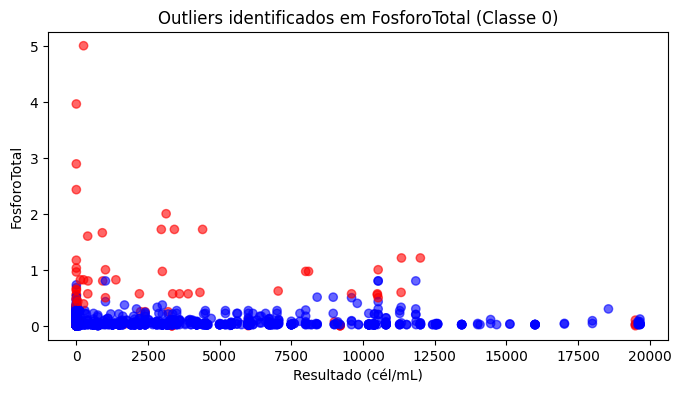

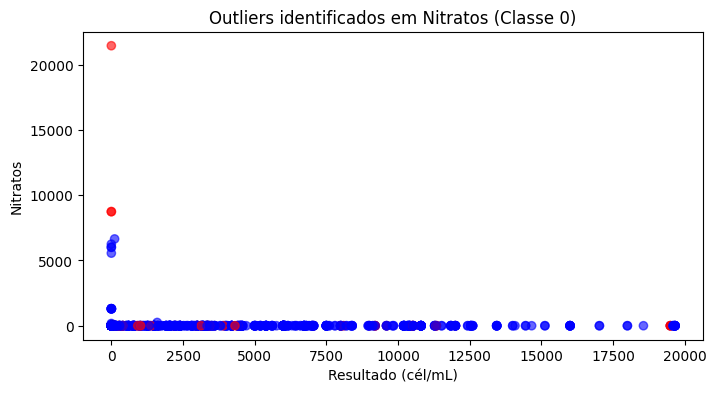

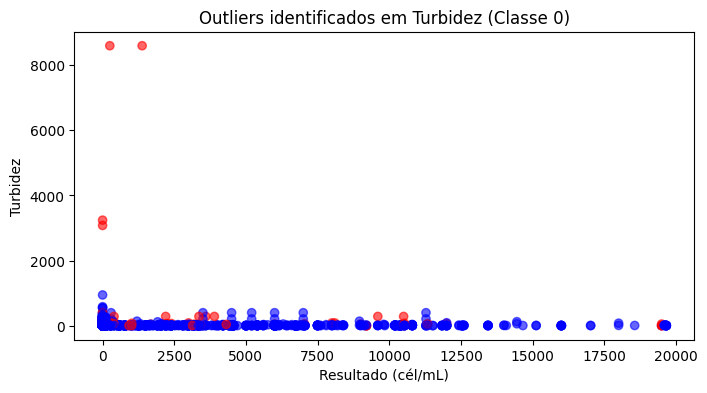

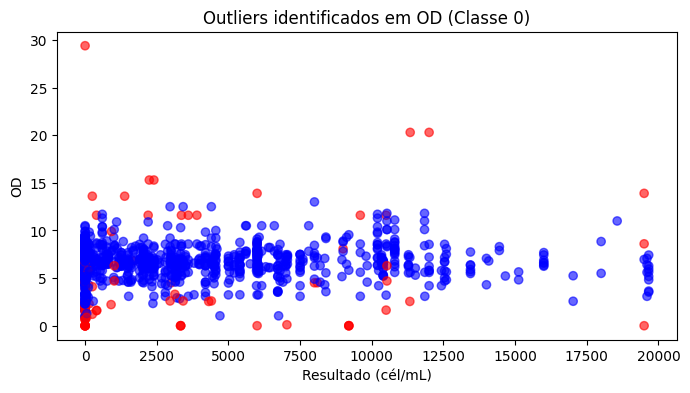

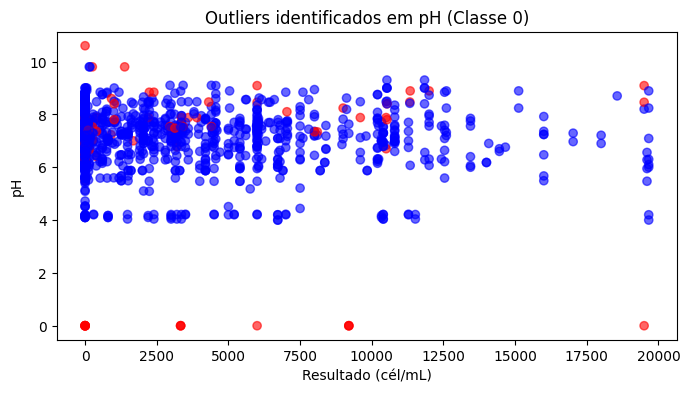

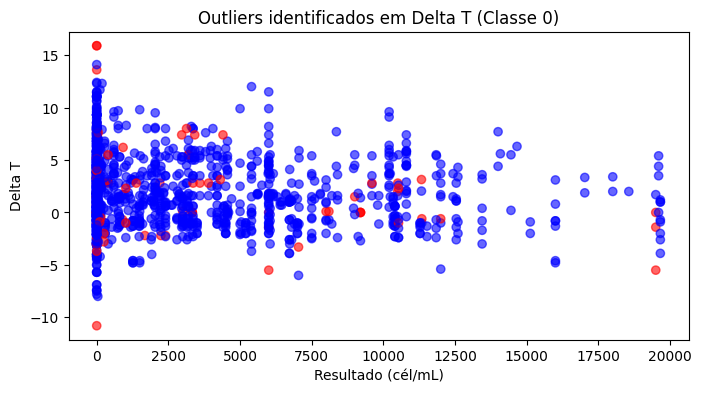

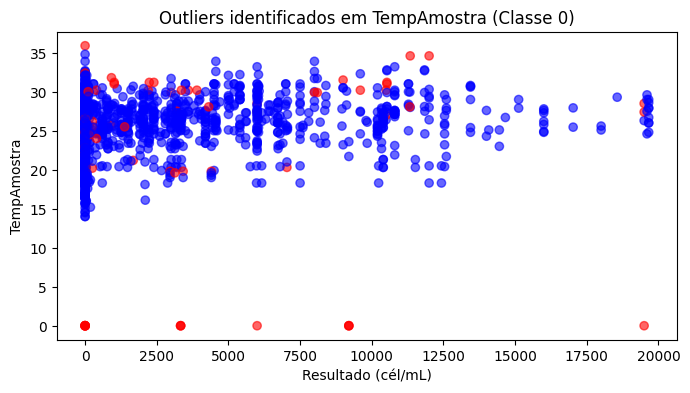

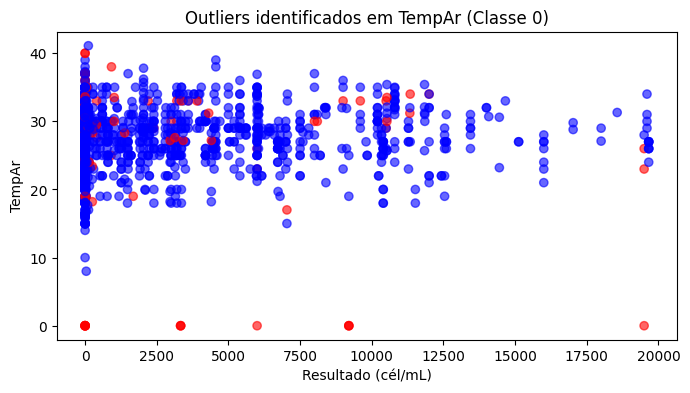

In [36]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Filtrar apenas a classe 0
df_class_0 = df_geitlerinema_50_c0_dropado[df_geitlerinema_50_c0_dropado['Classe'] == 0]

# Selecionar apenas colunas numéricas, excluindo as colunas binárias
exclude_columns = ['Verao', 'Inverno', 'Outono', 'Primavera', 'Classe', 'Resultado','Choveu']
numeric_columns = [col for col in df_class_0.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

# Configuração do Isolation Forest
isolation_forest = IsolationForest(
    contamination=0.05,  # Proporção de outliers
    random_state=42  # Para reprodutibilidade
)

# Ajustar o modelo aos dados numéricos da classe 0
isolation_forest.fit(df_class_0[numeric_columns])

# Predizer os outliers (-1 = outlier, 1 = normal)
outliers = isolation_forest.predict(df_class_0[numeric_columns])

# Adicionar a classificação de outliers ao dataframe
df_class_0['Outlier'] = outliers

# Filtrar os dados para remover os outliers
df_class_0_cleaned = df_class_0[df_class_0['Outlier'] == 1]

# Exibir resumo
print(f"Linhas antes da remoção: {len(df_class_0)}")
print(f"Linhas após a remoção de outliers: {len(df_class_0_cleaned)}")

# Visualizar outliers para cada coluna numérica (exceto as binárias)
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(
        df_class_0['Resultado'],
        df_class_0[col],
        c=['red' if outlier == -1 else 'blue' for outlier in df_class_0['Outlier']],
        alpha=0.6
    )
    plt.title(f"Outliers identificados em {col} (Classe 0)")
    plt.ylabel(col)
    plt.xlabel("Resultado (cél/mL)")
    plt.show()

Linhas antes da remoção: 239
Linhas após a remoção de outliers: 227


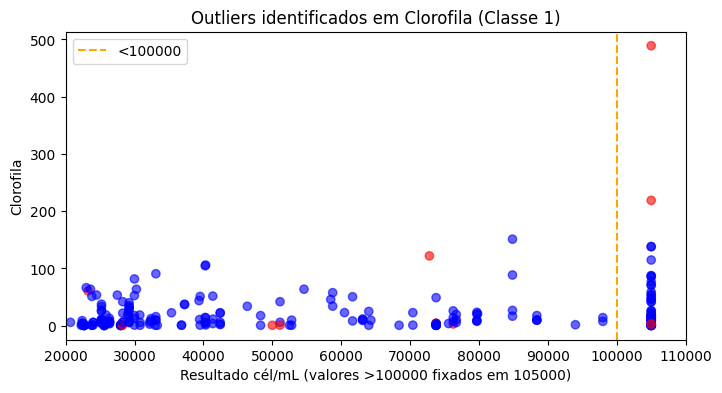

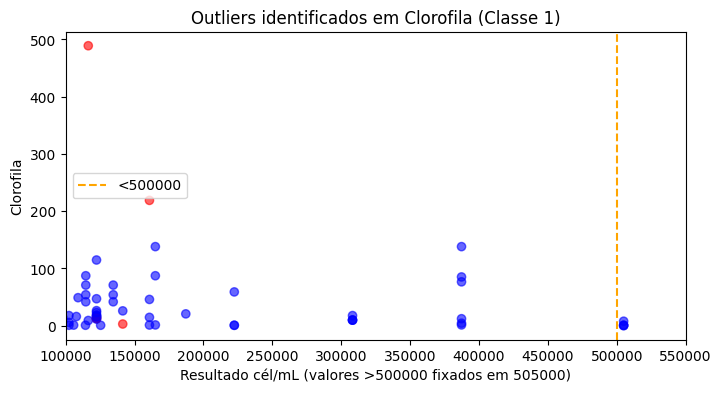

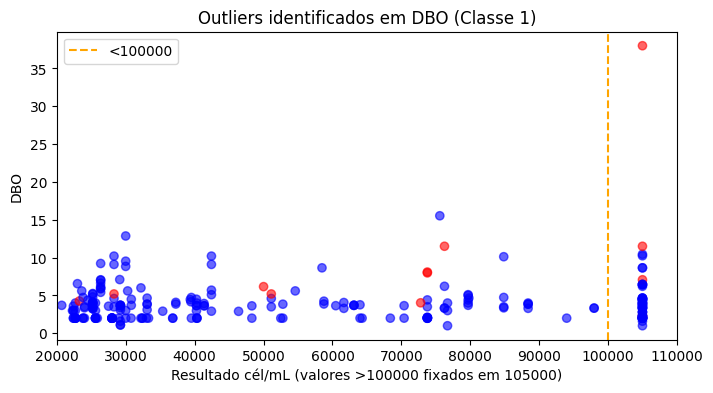

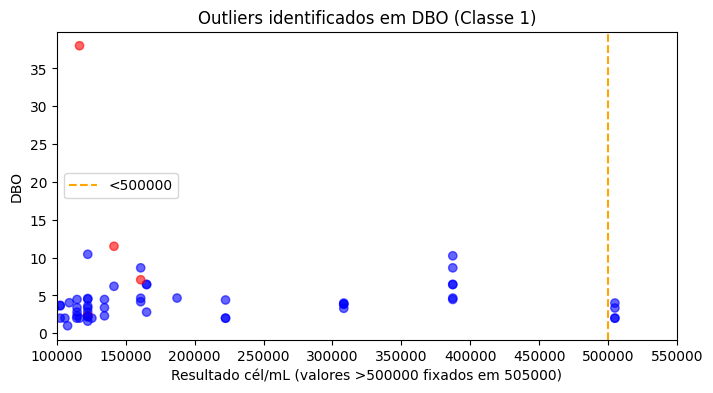

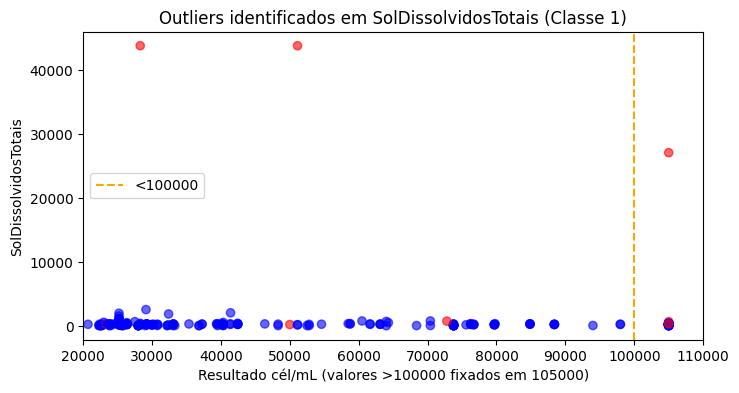

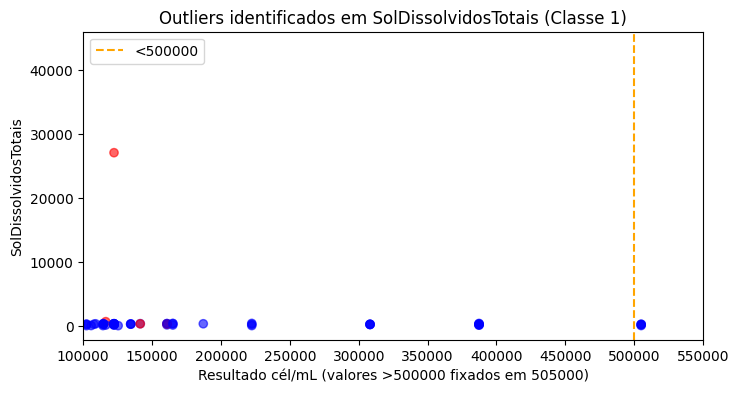

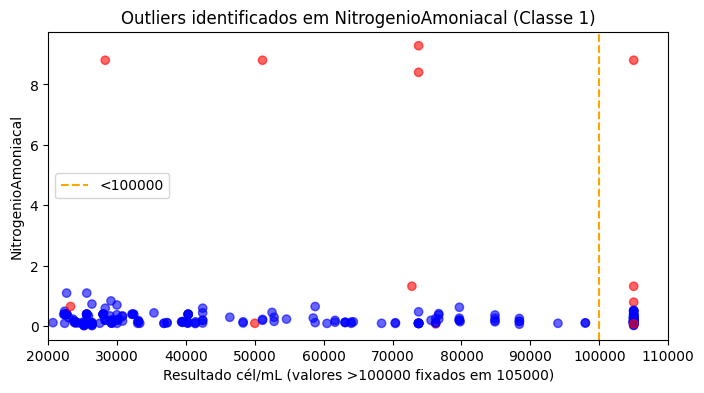

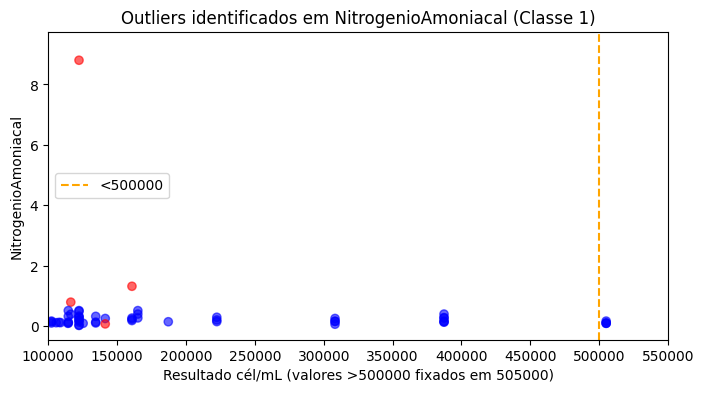

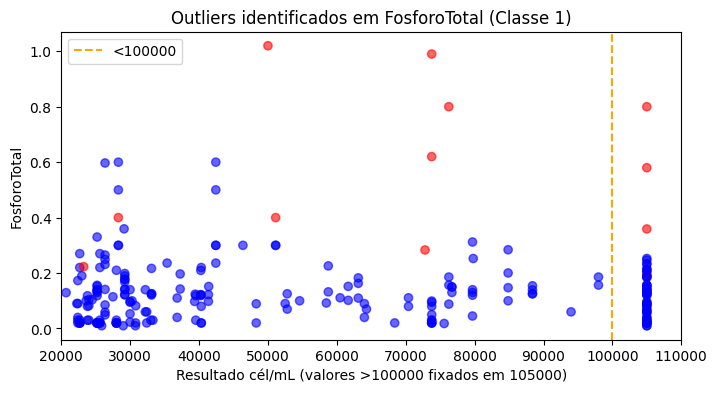

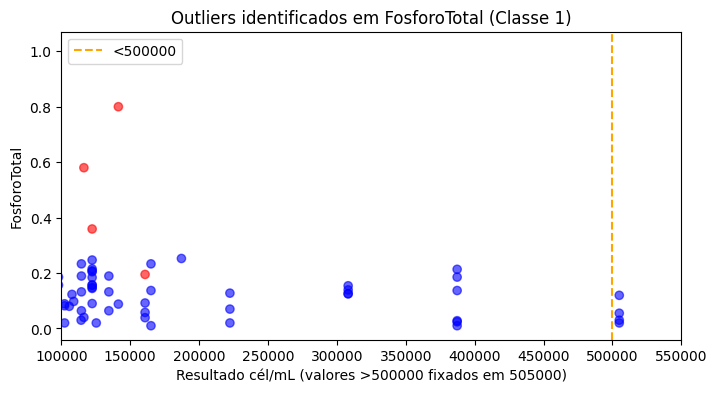

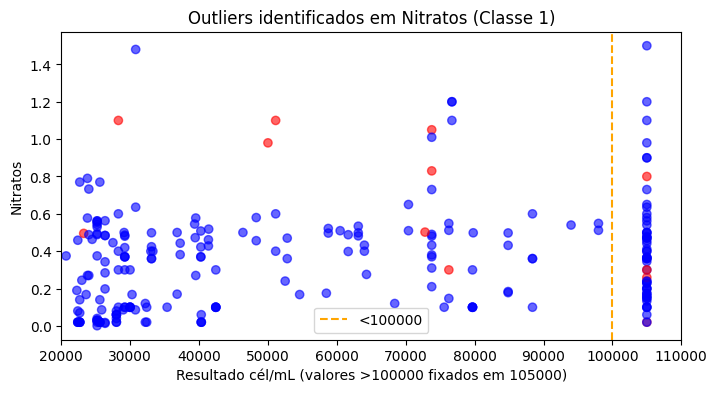

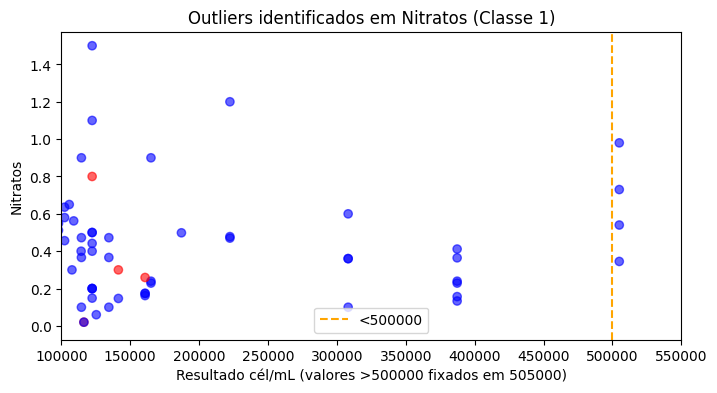

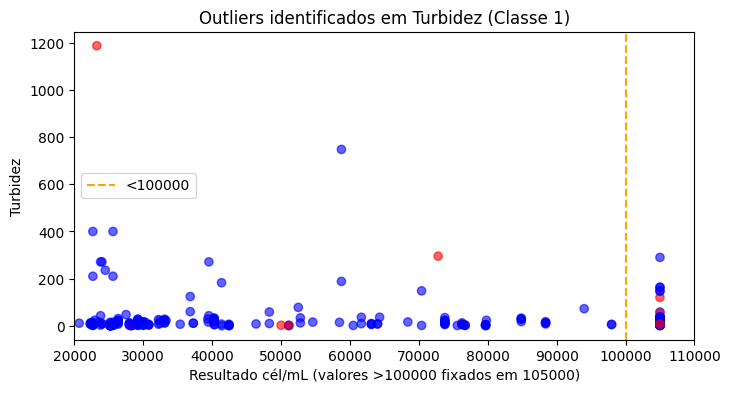

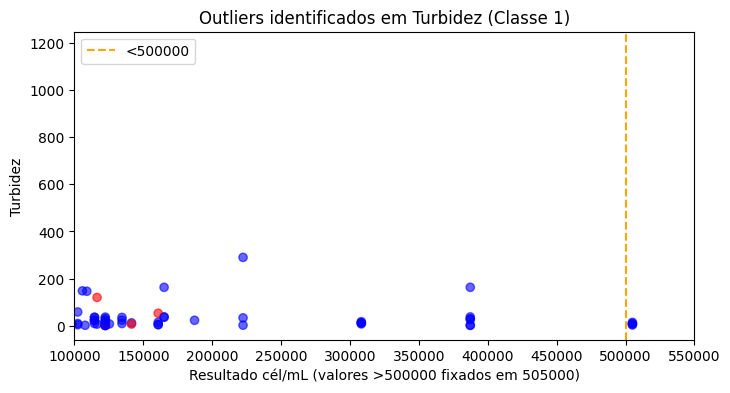

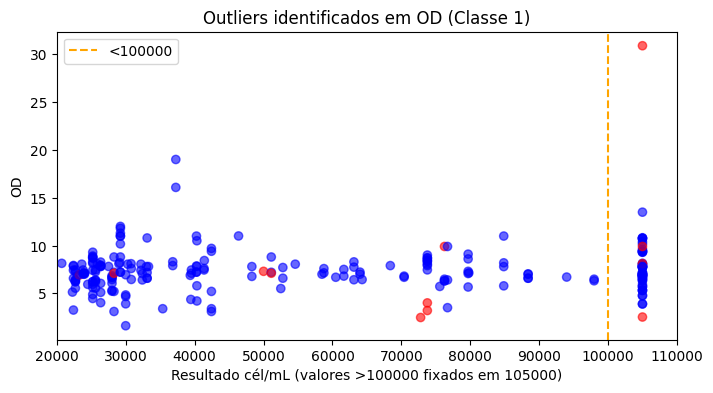

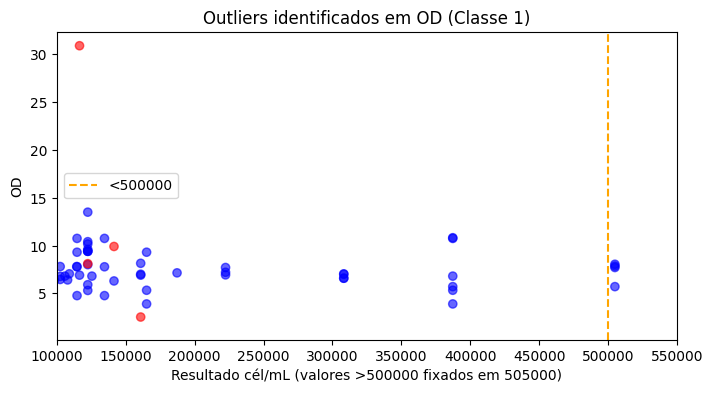

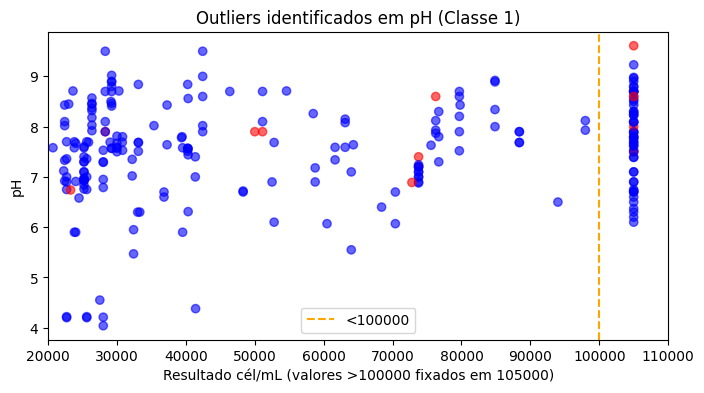

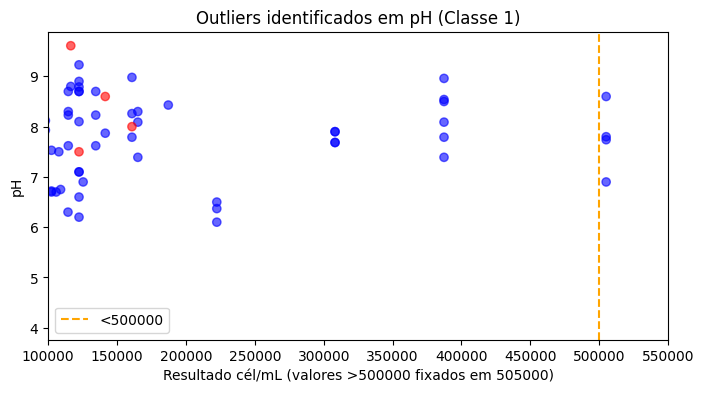

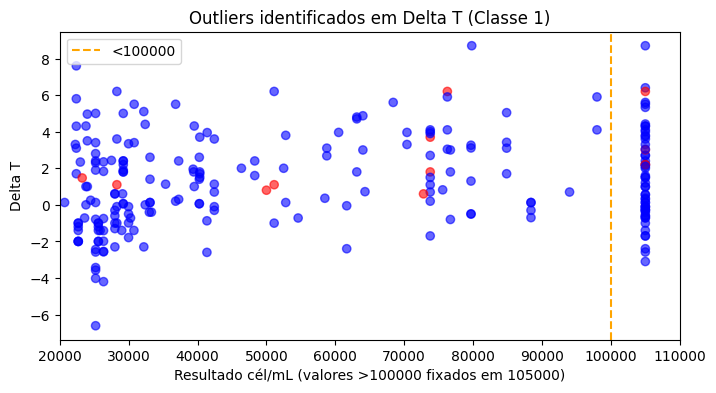

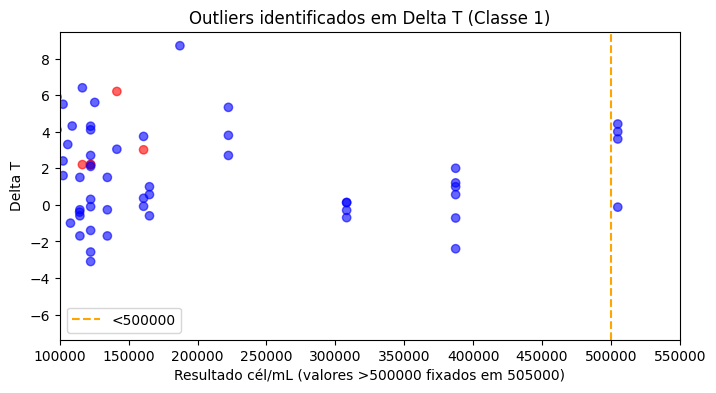

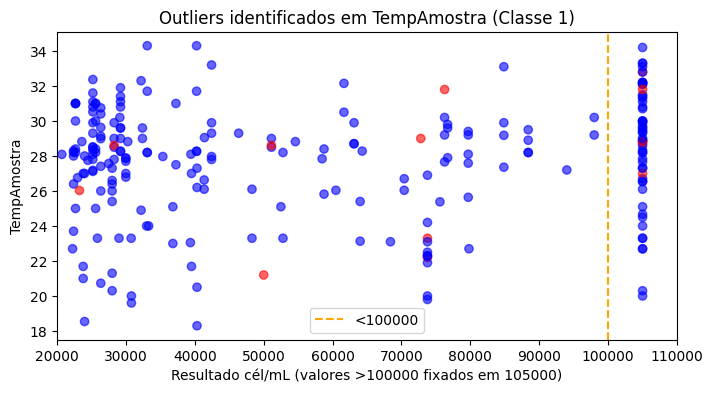

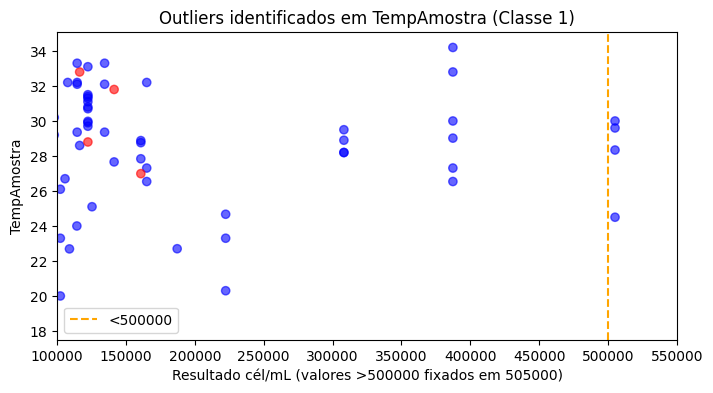

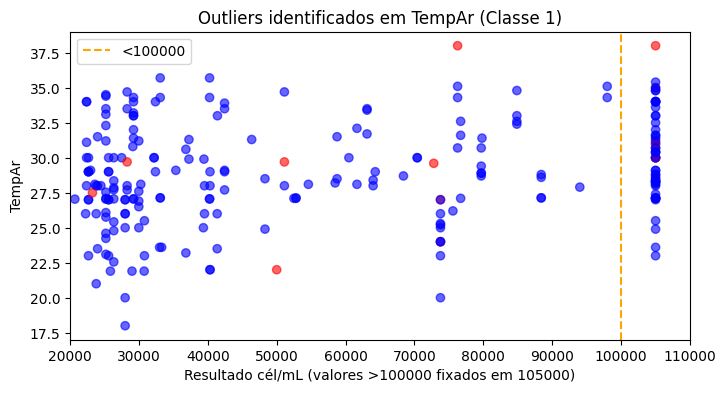

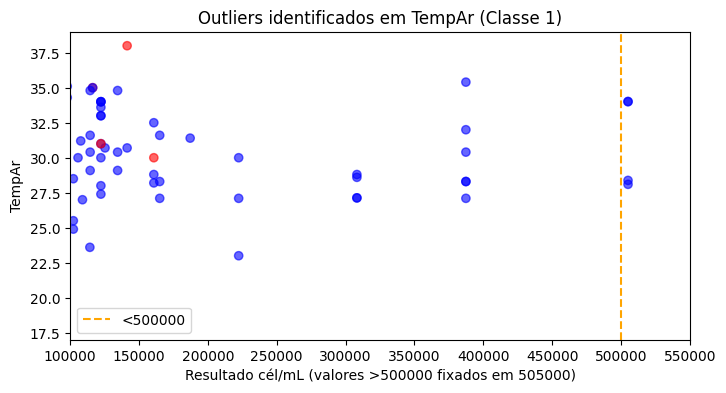

In [37]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Filtrar apenas a classe 1
df_class_1 = df_geitlerinema_50_c1[df_geitlerinema_50_c1['Classe'] == 1]

# Selecionar apenas colunas numéricas, excluindo as colunas irrelevantes
exclude_columns = ['Verao', 'Inverno', 'Outono', 'Primavera', 'Classe', 'Resultado']
numeric_columns = [col for col in df_class_1.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

# Configuração do Isolation Forest
isolation_forest = IsolationForest(
    contamination=0.05,  # Proporção de outliers
    random_state=42  # Para reprodutibilidade
)

# Ajustar o modelo aos dados numéricos da classe 1
isolation_forest.fit(df_class_1[numeric_columns])

# Predizer os outliers (-1 = outlier, 1 = normal)
outliers = isolation_forest.predict(df_class_1[numeric_columns])

# Adicionar a classificação de outliers ao dataframe
df_class_1['Outlier'] = outliers

# Filtrar os dados para remover os outliers
df_class_1_cleaned = df_class_1[df_class_1['Outlier'] == 1]

# Exibir resumo
print(f"Linhas antes da remoção: {len(df_class_1)}")
print(f"Linhas após a remoção de outliers: {len(df_class_1_cleaned)}")


# Visualizar outliers para cada coluna numérica (exceto as excluídas)
for col in numeric_columns:
    for value_resultado in [[20000, 100000],[100000, 500000]]:
      # Ajustar os valores de "Resultado" para o gráfico
      df_class_1['Resultado Ajustado'] = np.where(
          df_class_1['Resultado'] > value_resultado[1], value_resultado[1]+5000, df_class_1['Resultado']
      )

      plt.figure(figsize=(8, 4))
      plt.scatter(
          df_class_1['Resultado Ajustado'],  # Usar a coluna ajustada
          df_class_1[col],
          c=['red' if outlier == -1 else 'blue' for outlier in df_class_1['Outlier']],
          alpha=0.6
      )
      plt.title(f"Outliers identificados em {col} (Classe 1)")
      plt.ylabel(col)
      plt.xlim(value_resultado[0], value_resultado[1]+10000 if value_resultado[1]==100000 else value_resultado[1]+50000)
      plt.xlabel(f"Resultado cél/mL (valores >{value_resultado[1]} fixados em {value_resultado[1]+5000})")
      plt.axvline(value_resultado[1], color='orange', linestyle='--', label=f'<{value_resultado[1]}')  # Linha de referência
      plt.legend()
      plt.show()

In [38]:
  df_class_0_cleaned.describe()

,Clorofila,DBO,SolDissolvidosTotais,NitrogenioAmoniacal,FosforoTotal,Nitratos,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera,Outlier
count,1760.000,1760.000,1760.000,1760.000,1760.000,1760.000,1760.000,1760.000,1760.000,1760.000,1760.000,1760.000,1760.000,1760,1760.000,1760.000,1760.000,1760.000,1760.000,1760.000
mean,4.742,2.665,129.948,0.342,0.057,22.386,23.341,6.827,7.027,2.025,25.548,27.573,2170.919,2019-03-02 08:55:54.545454592,0.000,0.114,0.175,0.338,0.373,1.000
min,0.000,0.030,3.000,0.001,0.003,0.000,0.670,0.900,4.000,-8.000,14.000,8.000,0.000,2016-08-01 00:00:00,0.000,0.000,0.000,0.000,0.000,1.000
25%,0.800,2.000,50.000,0.140,0.020,0.020,3.985,6.108,6.500,-0.400,23.508,25.000,0.000,2018-06-15 00:00:00,0.000,0.000,0.000,0.000,0.000,1.000
50%,1.506,2.000,60.000,0.400,0.030,0.070,7.340,6.900,7.090,1.700,26.000,28.000,0.000,2018-11-19 00:00:00,0.000,0.000,0.000,0.000,0.000,1.000
75%,3.499,3.000,100.000,0.400,0.060,0.400,15.000,7.700,7.580,4.300,27.800,30.025,3030.000,2019-10-16 06:00:00,0.000,0.000,0.000,1.000,1.000,1.000
max,174.000,44.700,7270.000,3.050,0.800,6650.000,945.000,13.000,9.800,14.100,34.800,41.100,19660.000,2022-12-13 00:00:00,0.000,1.000,1.000,1.000,1.000,1.000
std,12.335,2.180,306.839,0.254,0.079,333.639,59.475,1.504,0.915,3.190,3.328,4.223,3825.642,NaN,0.000,0.318,0.380,0.473,0.484,0.000


In [39]:
df_class_1_cleaned.describe()

,Clorofila,DBO,SolDissolvidosTotais,NitrogenioAmoniacal,FosforoTotal,Nitratos,Turbidez,OD,pH,Delta T,TempAmostra,TempAr,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera,Outlier
count,227.000,227.000,227.000,227.000,227.000,227.000,227.000,227.000,227.000,227.000,227.000,227.000,227.000,227,227.000,227.000,227.000,227.000,227.000,227.000
mean,20.340,3.865,271.865,0.233,0.125,0.351,32.616,7.361,7.515,1.281,27.653,28.867,81515.626,2018-08-09 11:25:06.607929600,1.000,0.189,0.374,0.150,0.286,1.000
min,0.010,1.000,24.000,0.020,0.010,0.001,0.000,1.610,4.040,-6.610,18.300,18.000,20700.000,2017-01-16 00:00:00,1.000,0.000,0.000,0.000,0.000,1.000
25%,2.060,2.000,125.500,0.111,0.040,0.100,4.150,6.400,6.965,-0.600,26.070,27.000,28000.000,2017-06-19 00:00:00,1.000,0.000,0.000,0.000,0.000,1.000
50%,9.772,3.600,243.043,0.165,0.118,0.364,10.808,7.200,7.620,1.000,28.197,28.600,41400.000,2018-04-18 00:00:00,1.000,0.000,0.000,0.000,0.000,1.000
75%,25.001,4.467,288.423,0.344,0.157,0.498,23.200,8.100,8.192,3.105,29.750,31.400,88400.000,2019-11-04 00:00:00,1.000,0.000,1.000,0.000,1.000,1.000
max,151.170,15.530,2542.000,1.100,0.600,1.500,748.100,19.000,9.500,8.700,34.300,35.700,576000.000,2021-07-06 00:00:00,1.000,1.000,1.000,1.000,1.000,1.000
std,27.208,2.154,313.174,0.170,0.103,0.272,77.718,2.010,1.007,2.537,3.280,3.564,99461.253,NaN,0.000,0.393,0.485,0.358,0.453,0.000


In [ ]:
#df_class_0_cleaned = df_class_0_cleaned.drop('Choveu', axis=1)

In [40]:
df_geitlerinema_0e1 = pd.concat([df_class_0_cleaned,df_class_1_cleaned])
df_geitlerinema_0e1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 116 to 65
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Clorofila                           1987 non-null   float64       
 1   DBO                                 1987 non-null   float64       
 2   SolDissolvidosTotais                1987 non-null   float64       
 3   NitrogenioAmoniacal                 1987 non-null   float64       
 4   FosforoTotal                        1987 non-null   float64       
 5   Nitratos                            1987 non-null   float64       
 6   Turbidez                            1987 non-null   float64       
 7   OD                                  1987 non-null   float64       
 8   pH                                  1987 non-null   float64       
 9   Delta T                             1987 non-null   float64       
 10  TempAmostra                  

In [41]:
df_geitlerinema_0e1.to_csv('/content/drive/MyDrive/RESULTADOS MERGE 2/REMOVENDO NaN C0 E 50% RFRegressor VALORES C1 (ELIMINANDO OUTLIERS COM ISOLATION FOREST)/GEITLERINEMA sp./Cópia de DF-BASE_geitlerinema.csv', index=False)